In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
sns.set_style('ticks')
sns.set_context('talk')
import warnings; warnings.simplefilter('ignore')

In [4]:
data_dir = '/home/julia/data/ict/'

### Align processed photometry data to odor

In [5]:
mice = ['SHA', 'TAY', 'UUU', 'VVV', 'WEY', 'YOU']

df_all_odor = pd.DataFrame(index=np.arange(-5000, 15000))

for m in mice:
    
    df_mouse = pd.read_pickle(data_dir+"mice/{}.pkl".format(m)).filter(['odor_start', 'gpmt_corr'])
    ts_odor = []
    
    for row in range(len(df_mouse)):
        ts = df_mouse.loc[row, 'gpmt_corr']
        zero_idx = df_mouse.loc[row, 'odor_start'] - 1000  ## this is because we removed 1000 datapoints in the last step
        ts_odor.append(pd.Series(name="{}_{}".format(m,row), data=ts,
                                index=np.arange(-zero_idx, -zero_idx+ts.shape[0])))
    df_odor = pd.DataFrame(index=np.arange(-5000, 15000))        
    df_odor = df_odor.join(ts_odor, how='left')
    np.save(data_dir+"odor_aligned/{}_gpmt_corr.npy".format(m), np.asarray(df_odor))

    df_all_odor = df_all_odor.join(df_odor, how='left')

np.save(data_dir+"odor_aligned/all_gpmt_corr.npy", np.asarray(df_all_odor))

### Plot odor aligned response per mouse

In [17]:
df = pd.read_csv(data_dir+"all_mice.csv", usecols=['dataset', 'type', 'performance', 'day'])
gpmt = np.load(data_dir+"odor_aligned/all_gpmt_corr.npy".format(mouse))

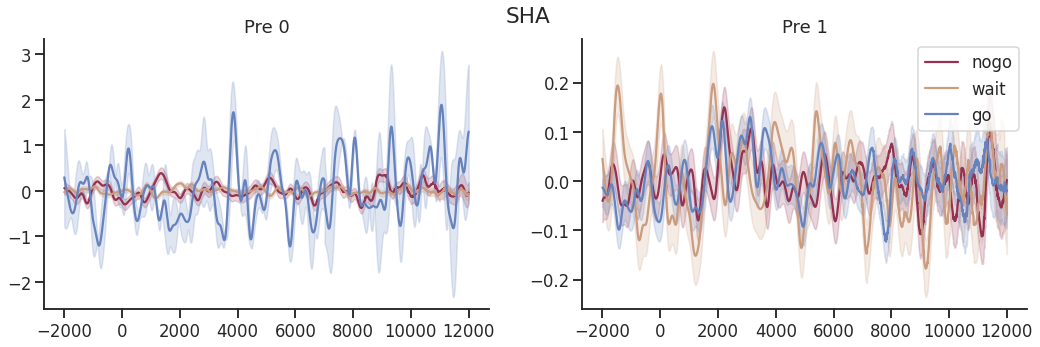

In [21]:
mouse = 'SHA'
days = [range(-8,0)]
period = ['Pre']
types = ['nogo', 'wait', 'go']
colors = [sns.color_palette('twilight_shifted',10)[i] for i in [-2,-4,2]]
performances = [0,1]

fig, ax = plt.subplots(1,2, figsize=(15,5))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                      (df['dataset'].str.contains(mouse)) & (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 12000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[3000:17000]
            sem = stats.sem(gpmt[:,idcs][3000:17000], axis=1, nan_policy='omit')

            ax[p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

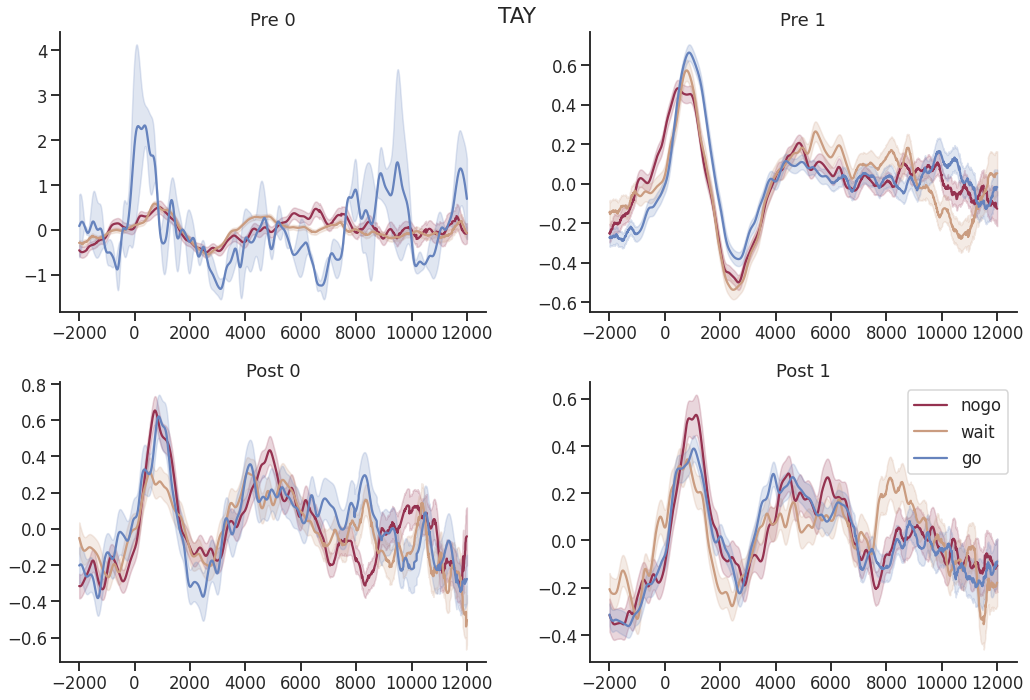

In [22]:
mouse = 'TAY'
days = [range(-7,0), range(0,6)]
period = ['Pre', 'Post']

fig, ax = plt.subplots(2,2, figsize=(15,10))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                      (df['dataset'].str.contains(mouse)) & (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 12000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[3000:17000]
            sem = stats.sem(gpmt[:,idcs][3000:17000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

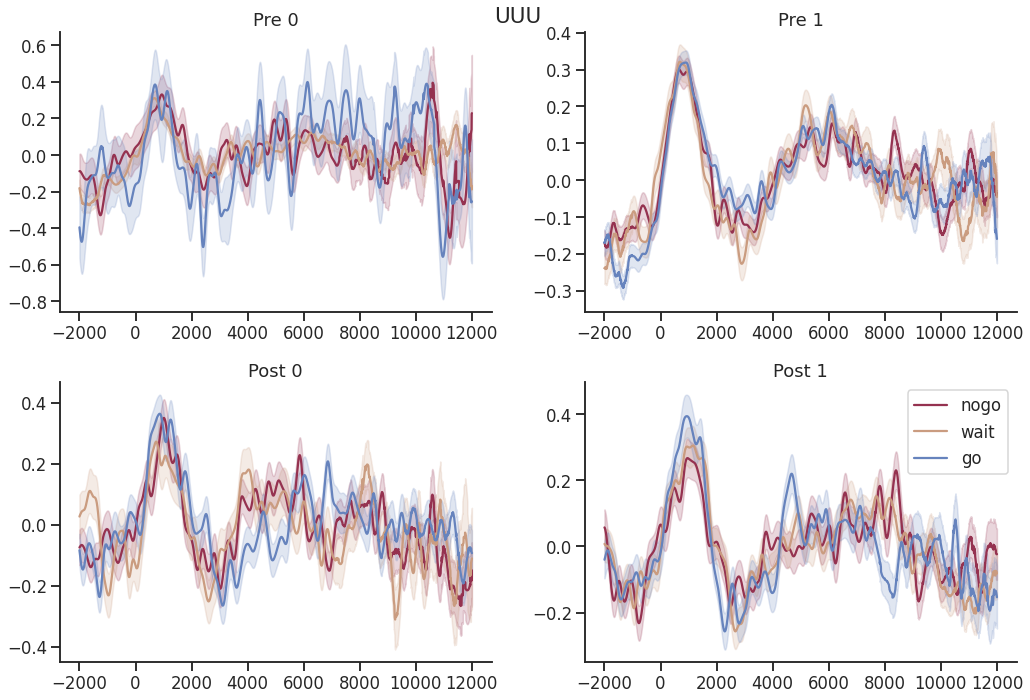

In [23]:
mouse = 'UUU'
days = [range(-11,0), range(0,8)]
period = ['Pre', 'Post']

fig, ax = plt.subplots(2,2, figsize=(15,10))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                      (df['dataset'].str.contains(mouse)) & (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 12000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[3000:17000]
            sem = stats.sem(gpmt[:,idcs][3000:17000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

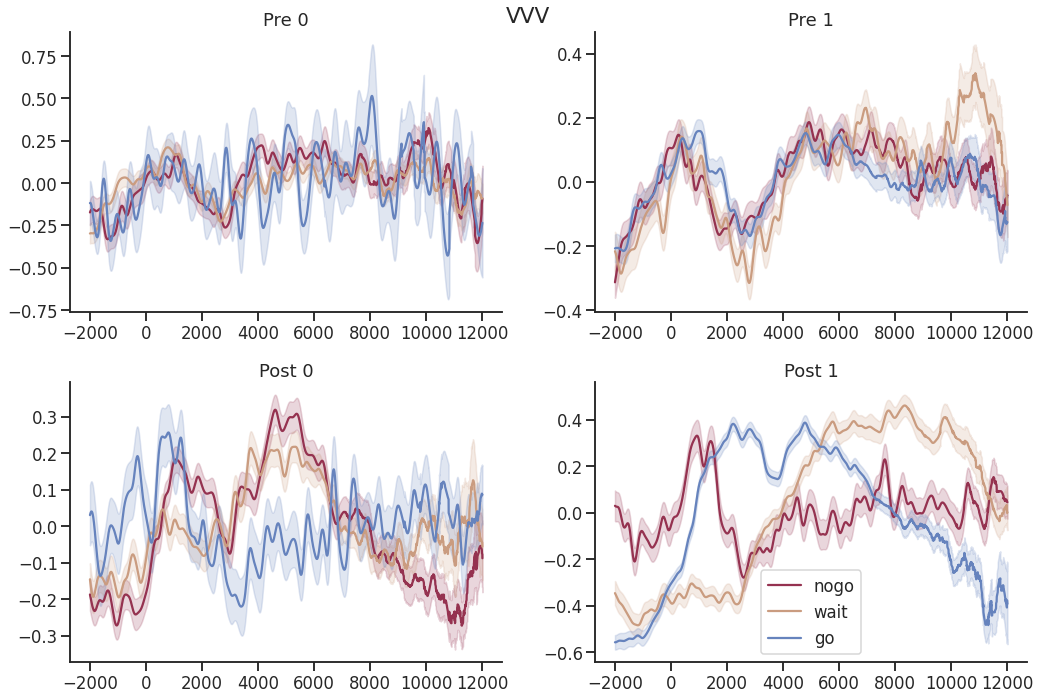

In [24]:
mouse = 'VVV'
days = [range(-5,0), range(0,6)]
period = ['Pre', 'Post']

fig, ax = plt.subplots(2,2, figsize=(15,10))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                      (df['dataset'].str.contains(mouse)) & (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 12000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[3000:17000]
            sem = stats.sem(gpmt[:,idcs][3000:17000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

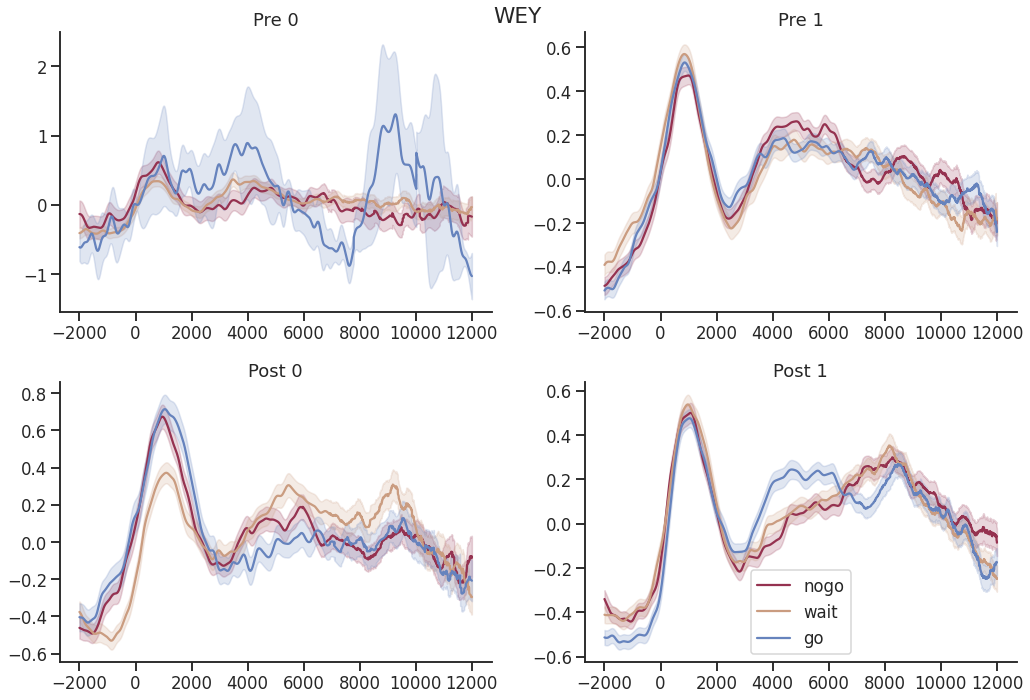

In [29]:
mouse = 'WEY'
days = [range(-7,0), range(0,10)]
period = ['Pre', 'Post']

fig, ax = plt.subplots(2,2, figsize=(15,10))
for d in range(len(days)):
    for p in performances:
        for c in range(len(types)):
            idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                      (df['dataset'].str.contains(mouse)) & (df['day'].isin(days[d]))].index

            x = np.arange(-2000, 12000)
            y = np.nanmean(gpmt[:,idcs], axis=1)[3000:17000]
            sem = stats.sem(gpmt[:,idcs][3000:17000], axis=1, nan_policy='omit')

            ax[d,p].plot(x, y, color=colors[c], label="{}".format(types[c]))
            ax[d,p].fill_between(x, (y-sem), (y+sem), color=colors[c], alpha=.2)
            ax[d,p].set_title('{} {}'.format(period[d], p))
            sns.despine()
ax[d,p].legend()
fig.suptitle("{}".format(mouse));
plt.tight_layout();

 ### Average across all mice

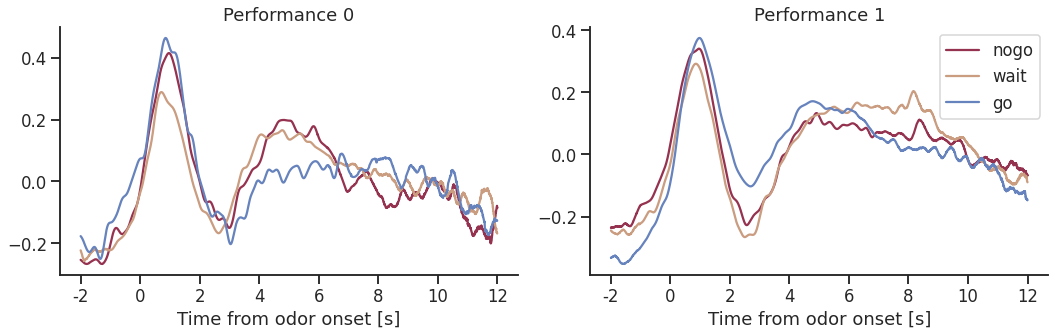

In [30]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
mice = ['TAY', 'UUU', 'VVV', 'WEY']


for c in range(len(types)):
    for p in performances:

        L = np.zeros((gpmt.shape[0], len(mice)))
        for m in range(len(mice)):
            idcs = df[(df['type']==types[c]) & (df['performance']==p) & 
                      (df['dataset'].str.contains(mice[m]))].index
            L[:,m] = np.nanmean(gpmt[:,idcs], axis=1)

        x = np.arange(-2000, 12000)
        y = np.nanmean(L[3000:17000], axis=1)

        ax[p].plot(x, y, color=colors[c], label="{}".format(types[c]))
        ax[p].set_xticks([-2000, 0, 2000, 4000,6000,8000,10000,12000])
        ax[p].set_xticklabels([-2,0,2,4,6,8,10,12])
        ax[p].set_xlabel('Time from odor onset [s]')
        ax[p].set_title('Performance {}'.format(performances[p]))
        sns.despine()

    ax[p].legend()
plt.tight_layout()